In [20]:
%pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
 
od.download('https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Skipping, found downloaded files in ".\hourly-energy-consumption" (use force=True to force download)


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import xgboost as xgb

In [22]:
df = pd.read_csv('hourly-energy-consumption/PJME_hourly.csv').set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [23]:
df

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


,PJME_MW,year
Datetime,,
2002-12-31 01:00:00,26498.0,2002
2002-12-31 02:00:00,25147.0,2002
2002-12-31 03:00:00,24574.0,2002
2002-12-31 04:00:00,24393.0,2002
2002-12-31 05:00:00,24860.0,2002
...,...,...
2018-01-01 20:00:00,44284.0,2018
2018-01-01 21:00:00,43751.0,2018
2018-01-01 22:00:00,42402.0,2018


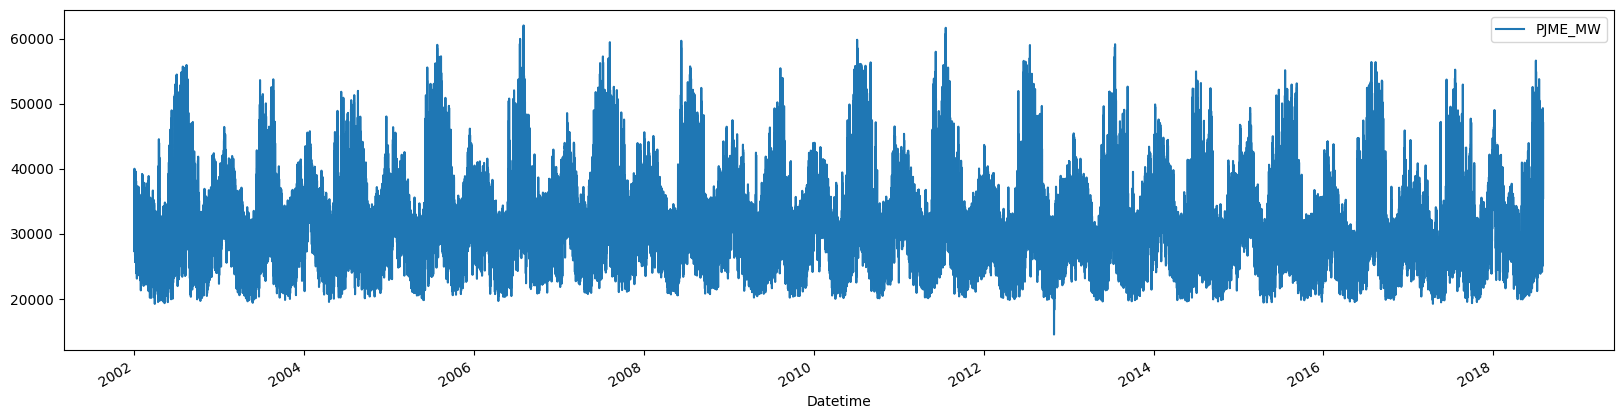

In [24]:
df.plot(figsize=(20, 5))
df['year'] = df.index.year
df

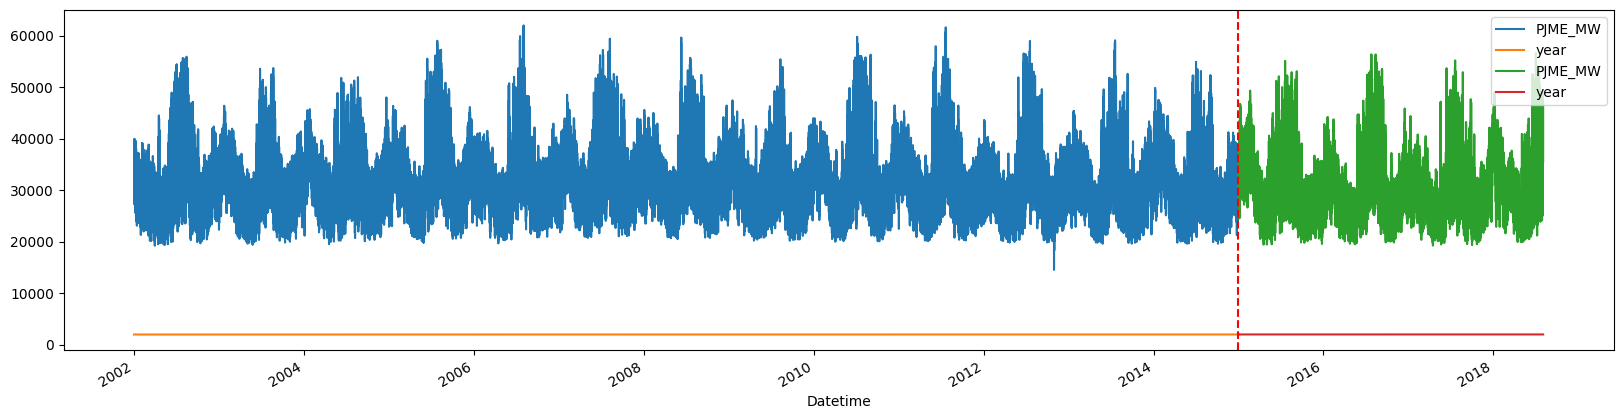

In [39]:
train  = df[df['year'] < 2015]
test = df[df['year'] >= 2015]

fig, ax = plt.subplots(figsize=(20, 5))
train.plot(ax=ax,  label='train')
test.plot(ax=ax, label='test')
ax.axvline(test.index[0], color='r', linestyle='--')

<AxesSubplot: title={'center': '1 week of data'}, xlabel='Datetime'>

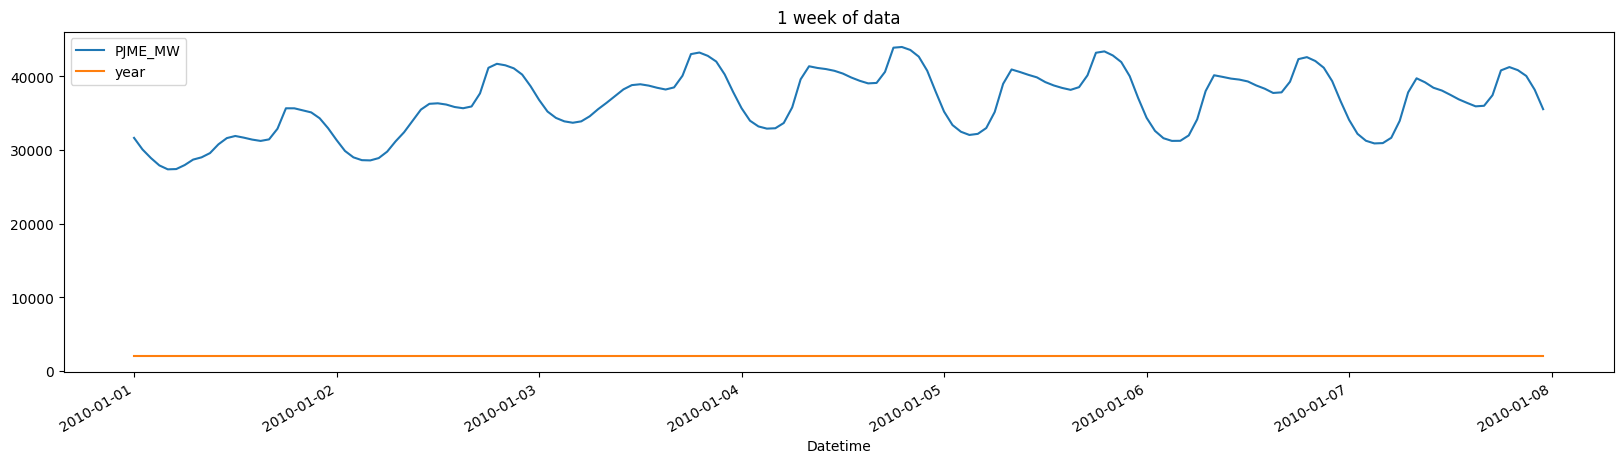

In [45]:
# getting 1 week of data

df.loc['2010-01-01':'2010-01-07'].plot(figsize=(20, 5), title='1 week of data')